# Modelling of Cognitive Processes
## Backpropagation 
---
Lesson 10   
26/11/2019   
Pieter Huycke   

# Overview

## Practical
1. The iris dataset: novice
2. Making your own model: journeyman
2. Making your own model: adept
3. Your own cats and dogs model: expert

# Practical

# 1. The iris dataset: novice

## The iris dataset revisited

Let's take a look at the linear separability of the features that are available in the Iris dataset.   
In the next slide, we create a pairplot of two features available in the data:
- sepal length
- sepal width

The plots were made using the Python package ```seaborn```.   
How the plots were construed is of no importance to you, **only what the plots represent is important**.

In [1]:
# import modules
import seaborn           as sns
import matplotlib.pyplot as plt

# general plotting parameters
sns.set(style       = "ticks", 
        color_codes = True)
plt.rcParams['figure.figsize'] = [8, 4]

# plot the Iris dataset features against each other
iris = sns.load_dataset("iris")

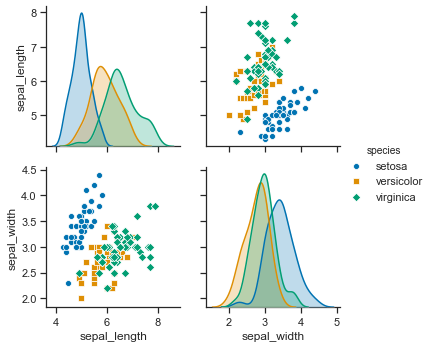

In [2]:
feature_pairs = sns.pairplot(iris, 
                             hue     = "species", 
                             markers = ["o", "s", "D"],
                             palette = sns.color_palette('colorblind'),
                             vars    = ['sepal_length', 'sepal_width'])

## The iris dataset: novice

<ins>Problem statement</ins>  

It should be clear from the plot in the previous slide that the features "sepal length" and "sepal width" are not linearly separable for the <font color='orange'>versicolor</font> and <font color='green'>virginica</font> family.   
Thus, a Perceptron is not able to differentiate versicolor from virginica purely based on the measurements of sepal length and sepal width.   

Your task: build a model that is able to do the task that the Perceptron cannot do.   

Check for yourself how many hidden layers are needed to obtain an accuracy of 100% (use <font color='blue'>G</font><font color='red'>o</font><font color='yellow'>o</font><font color='blue'>g</font><font color='green'>l</font><font color='red'>e</font> if you can't figure out how to implement hidden layers in $scikit-learn$).   

**Try to find the 'minimal model'**: the model that has as few hidden layers and hidden units as possible, but is still able to achieve maximal performance.   
Try to find an automated way to achieve this (i.e. do not specify every possibility manually).

# 2. Making your own model: a stroop model

## The iris dataset: journeyman

<ins>Problem statement (1/2)</ins>  

You would like to model a participant that is performing a Stroop task [(Stroop, 1935)](https://pure.mpg.de/rest/items/item_2389918/component/file_2389917/content).   
Since this is your first time that you build a model on your own, you decide to start with an easy version of this well-known paradigm.   

You decide to use two different word stimuli (GREEN and RED), and two different colors (<font color='green'>green</font> and <font color='red'>red</font>).   
Thus, you have the following possible stimuli:
- <font color='red'>red</font>
- <font color='red'>green</font>
- <font color='green'>red</font>
- <font color='green'>green</font>

## The iris dataset: journeyman

<ins>Problem statement (2/2)</ins>  

In line with the classic stroop task, your model should react to either the word dimension or the color dimension.   
Only two possible answers are available: LEFT (coded as 1), and RIGHT (coded as -1).   

Show your model each possible stimulus 50 times, along with the expected response.   
First train your model using a model without hidden units (i.e. a simple two-layered network), then use a model that has a hidden layer with **two** hidden layers.   
Play around with the units in the hidden layers to see how this affects model performance.   

Compare the model performances, and try the figure out why the results (do not) differ.

In [3]:
# import: general and scikit-learn specific
import numpy as np

from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# define the input patterns
in_1 = np.array([0, 1, 0, 1, 0, 1]) 
in_2 = np.array([0, 1, 1, 0, 1, 0]) 
in_3 = np.array([0, 1, 0, 1, 1, 0])
in_4 = np.array([0, 1, 1, 0, 0, 1])
in_5 = np.array([1, 0, 0, 1, 0, 1])
in_6 = np.array([1, 0, 1, 0, 1, 0])
in_7 = np.array([1, 0, 0, 1, 1, 0])
in_8 = np.array([1, 0, 1, 0, 0, 1])

# define the targets
t1 = np.array( [1])
t2 = np.array([-1])
t3 = np.array( [1])
t4 = np.array([-1])
t5 = np.array( [1])
t6 = np.array([-1])
t7 = np.array([-1])
t8 = np.array( [1])

# zip them together
input_arr  = np.vstack((in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8))
target_arr = np.vstack((t1, t2, t3, t4, t5, t6, t7, t8))

del in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8
del t1,   t2,   t3,   t4,   t5,   t6,   t7,   t8

inputs  = np.tile(input_arr, (50,1))
targets = np.tile(target_arr, (50,1))
targets = np.ravel(targets)

del input_arr, target_arr

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                    targets)

In [6]:
# ---------- #
# PERCEPTRON #
# ---------- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 10000,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      n_iter_no_change = 10)


# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('Perceptron accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Perceptron accuracy:
	 72.00%


In [7]:
# --- #
# MLP #
# --- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = MLPClassifier(hidden_layer_sizes = (10,10, ),
                                         max_iter           = 10000, 
                                         n_iter_no_change   = 10)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('MLP accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

MLP accuracy:
	 100.00%


# Making your own model: adept

## Making your own model: adept

<ins>Problem statement</ins>  

Will be filled in later.

In [8]:
# import: general and scikit-learn specific
import itertools
import numpy                 as np
import pandas                as pd

from sklearn                 import datasets
from sklearn.linear_model    import Perceptron
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
# import the iris flower dataset
iris = datasets.load_iris()
X    = iris.data
y    = iris.target

In [10]:
# define where to store the simulation results
arr = np.zeros((50, 3))

# find all permutations
permutations = list(itertools.combinations('012', 2))

# 50 simulations for each comparison
for i in range(50):
    for perm in permutations:
        
        # apply boolean mask to get the values we need from the array
        first_class, second_class = int(perm[0]), int(perm[1])
        mask    = np.where((y == first_class) | (y == second_class))
        X_selec = X[mask]
        y_selec = y[mask]
    
        # split data in training and testing set
        X_train, X_test, y_train, y_test = train_test_split(X_selec, 
                                                            y_selec)
        
        # classifier
        classification_algorithm = Perceptron(max_iter         = 100,
                                              tol              = 1e-3,
                                              verbose          = 0,
                                              n_iter_no_change = 5)
        
        # fit ('train') classifier to the training data
        classification_algorithm.fit(X_train, y_train)
        
        # predict y based on x for the test data
        y_pred = classification_algorithm.predict(X_test)
        
        # link the names of the families to the int label
        name_dict = {0: 'setosa',
                     1: 'versicolor',
                     2: 'virginica'}
        
        # store the accuracy in the pandas DataFrame
        arr[i, permutations.index(perm)] = accuracy_score(y_test, y_pred) * 100

# Your own cats and dogs model: expert

## Model building

Similar to the last exercise of the previous practical session, we will work with images to train our model.   
The images we will be working with in this case are images of both cats and dogs.   
For the sake of parsimony, we will only work with 15 images of each category.   

Because image processing is not in our final competences, we did the image processing for you.   
Although we don't expect you to come up with a preprocessing strategy yourself, we will shortly explain how we preprocessed our training set.   

1. We grayscaled the images
2. We resized the images so that they all have the same dimensions ($80 \times 80$)
3. We normalize the images by subtracting the mean of each image from each individual image pixel

Below, we show an original image of a cat, and its preprocessed equivalent.

In [12]:
# import relevant modules
import cv2
import matplotlib.pyplot as plt
import numpy             as np
import os

In [13]:
# constants
DIM_SIZE     = 80
CAT_COUNT    = 0
DOG_COUNT    = 0 

ROOT         = r'C:\Users\pieter\Downloads\GitHub\modeling-master\AY 2019 - 2020\Lesson 10\Practical session\solutions\downloads'
TRAIN_DIR    = os.path.join(ROOT, 'train')

In [14]:
# function def
def process_image(file_location, file_name, dimension):
    
    '''
    :param str file_location: The path where the image is located
    :param str file_name: The name of the image
    
    :return: The rescaled (80 x 80), normalized and grayscaled 
             NumPy array depicting image
    '''
    
    file  = os.path.join(file_location, file_name)
    imag  = cv2.imread(file,
                       cv2.IMREAD_GRAYSCALE)
    imag  = cv2.resize(imag,
                       dsize = (dimension, dimension))
    
    imag  = imag.astype('float64')
    imag -= np.mean(imag)
    
    return imag

Text(0.5, 1.0, 'Preprocessed cat')

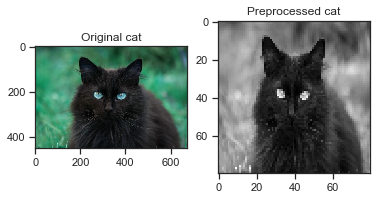

In [15]:
# define our list of training and test samples
images = os.listdir(TRAIN_DIR)

# original cat
plt.subplot(1, 2, 1)
original_image = cv2.imread(os.path.join(TRAIN_DIR, images[3]))
plt.imshow(original_image)
plt.title('Original cat')

# preprocessed cat
plt.subplot(1, 2, 2)
preprocessed_image = process_image(TRAIN_DIR, 
                                   images[3], 
                                   DIM_SIZE)
plt.imshow(preprocessed_image,
           cmap = "gray")
plt.title('Preprocessed cat')

## Your own cats and dogs model: expert

<ins>Problem statement</ins>  

Train a model using the provided images.   
The goal of your model building is to create a model that is able to label a new image correctly as a cat or dog.   
Use 29 of your images to train the model, and keep the last image to test your model.   
Play around with the model parameters (number of hidden layers, number of units in your hidden layer, ...) to see how this impacts your model's performance.   

Use ```help(MLPClassifier)``` or ```print(MLPClassifier.__doc__)``` to learn more about the function arguments that can be altered.